# Nome: Augusto Cesar da F. dos Santos
# Matrícula: M048.124.004


# Tarefa 2

Modelagem da relação entre o índice de massa corporal (IMC) e a pressão arterial sistólica (PAS)
A base de dados National Health and Nutrition Examination Survey (NHANES) contém uma vasta gama de informações sobre a saúde e nutrição de indivíduos nos Estados Unidos. Neste exercício, vamos utilizar os dados da pesquisa de 2015-2016 para estudar a relação entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS) em adultos com idade entre 20 e 60 anos.

Objetivo: criar um modelo de regressão linear para prever a Pressão Arterial Sistólica (PAS) a partir do Índice de Massa Corporal (IMC) e avaliar o desempenho deste modelo. Além disso, você deve interpretar os resultados obtidos, com foco na relação entre essas duas variáveis.



# Carregandos bibliotecas importantes para a atividade

In [5]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=311b7697b8af8472da42e73e0b6b4be874e91a9cb302aaa0ae2816bed263d38e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [6]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

import io, os

import missingno as miss

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats
import statsmodels.api as sm

from ydata_profiling import ProfileReport

from google.colab import drive

# Montando o drive para carregar o arquivo

In [7]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
# Demographic Variables: Contém informações demográficas como idade e sexo.
# Atributo de interesse: RIDAGEYR (Idade em anos)
df_age = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/DEMO_I.XPT')

# Body Measures: Contém informações sobre medidas corporais, incluindo o Índice de Massa Corporal (IMC).
# Atributo de interesse: BMXBMI (Índice de Massa Corporal)
df_imc = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/BMX_I.XPT')

# Blood Pressure: Contém dados sobre medições de pressão arterial.
# Atributo de interesse: BPXSY1 (Pressão Arterial Sistólica - 1ª Medição)
df_bps = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/BPX_I.XPT')

#Nível de glicose no sangue (LBGLU)
df_glu = pd.read_sas('/content/drive/MyDrive/2024-2/4 - AM_na_saude/GLU_I.XPT')

In [10]:
df_imc.columns

Index(['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
       'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG',
       'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST',
       'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4', 'BMDAVSAD', 'BMDSADCM'],
      dtype='object')

In [ ]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9971 non-null   float64
 1   SDDSRVYR  9971 non-null   float64
 2   RIDSTATR  9971 non-null   float64
 3   RIAGENDR  9971 non-null   float64
 4   RIDAGEYR  9971 non-null   float64
 5   RIDAGEMN  695 non-null    float64
 6   RIDRETH1  9971 non-null   float64
 7   RIDRETH3  9971 non-null   float64
 8   RIDEXMON  9544 non-null   float64
 9   RIDEXAGM  4060 non-null   float64
 10  DMQMILIZ  6149 non-null   float64
 11  DMQADFC   527 non-null    float64
 12  DMDBORN4  9971 non-null   float64
 13  DMDCITZN  9969 non-null   float64
 14  DMDYRSUS  2236 non-null   float64
 15  DMDEDUC3  2647 non-null   float64
 16  DMDEDUC2  5719 non-null   float64
 17  DMDMARTL  5719 non-null   float64
 18  RIDEXPRG  1288 non-null   float64
 19  SIALANG   9971 non-null   float64
 20  SIAPROXY  9970 non-null   floa

In [ ]:
df_imc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   BMDSTATS  9544 non-null   float64
 2   BMXWT     9445 non-null   float64
 3   BMIWT     443 non-null    float64
 4   BMXRECUM  1073 non-null   float64
 5   BMIRECUM  33 non-null     float64
 6   BMXHEAD   215 non-null    float64
 7   BMIHEAD   0 non-null      float64
 8   BMXHT     8769 non-null   float64
 9   BMIHT     105 non-null    float64
 10  BMXBMI    8756 non-null   float64
 11  BMDBMIC   3340 non-null   float64
 12  BMXLEG    7110 non-null   float64
 13  BMILEG    402 non-null    float64
 14  BMXARML   8976 non-null   float64
 15  BMIARML   420 non-null    float64
 16  BMXARMC   8976 non-null   float64
 17  BMIARMC   421 non-null    float64
 18  BMXWAIST  8313 non-null   float64
 19  BMIWAIST  489 non-null    float64
 20  BMXSAD1   6983 non-null   floa

In [ ]:
df_bps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   PEASCCT1  236 non-null    float64
 2   BPXCHR    1938 non-null   float64
 3   BPAARM    7398 non-null   float64
 4   BPACSZ    7386 non-null   float64
 5   BPXPLS    7376 non-null   float64
 6   BPXPULS   9314 non-null   float64
 7   BPXPTY    7376 non-null   float64
 8   BPXML1    7371 non-null   float64
 9   BPXSY1    7145 non-null   float64
 10  BPXDI1    7145 non-null   float64
 11  BPAEN1    7145 non-null   float64
 12  BPXSY2    7313 non-null   float64
 13  BPXDI2    7313 non-null   float64
 14  BPAEN2    7313 non-null   float64
 15  BPXSY3    7276 non-null   float64
 16  BPXDI3    7276 non-null   float64
 17  BPAEN3    7276 non-null   float64
 18  BPXSY4    324 non-null    float64
 19  BPXDI4    324 non-null    float64
 20  BPAEN4    324 non-null    floa

#  Realizando o merge das três tabelas utilizando o atributo SEQN como chave


In [ ]:
df_merged = pd.merge(df_age, df_imc, on='SEQN', how='inner')
df_merged = pd.merge(df_merged, df_bps, on='SEQN', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 92 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   SDDSRVYR  9544 non-null   float64
 2   RIDSTATR  9544 non-null   float64
 3   RIAGENDR  9544 non-null   float64
 4   RIDAGEYR  9544 non-null   float64
 5   RIDAGEMN  662 non-null    float64
 6   RIDRETH1  9544 non-null   float64
 7   RIDRETH3  9544 non-null   float64
 8   RIDEXMON  9544 non-null   float64
 9   RIDEXAGM  4060 non-null   float64
 10  DMQMILIZ  5887 non-null   float64
 11  DMQADFC   507 non-null    float64
 12  DMDBORN4  9544 non-null   float64
 13  DMDCITZN  9542 non-null   float64
 14  DMDYRSUS  2135 non-null   float64
 15  DMDEDUC3  2546 non-null   float64
 16  DMDEDUC2  5474 non-null   float64
 17  DMDMARTL  5474 non-null   float64
 18  RIDEXPRG  1240 non-null   float64
 19  SIALANG   9544 non-null   float64
 20  SIAPROXY  9543 non-null   floa

# Filtragem dos dados:
## Selecione os participantes com idade entre 20 e 60 anos (RIDAGEYR).
## Filtre as colunas de interesse: RIDAGEYR (Idade), BMXBMI (IMC) e BPXSY1 (PAS).


In [ ]:
data_query = df_merged[['RIDAGEYR', 'BMXBMI', 'BPXSY1']]
data_query

,RIDAGEYR,BMXBMI,BPXSY1
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
...,...,...,...
9539,2.0,NaN,NaN
9540,6.0,18.2,NaN
9541,35.0,26.0,104.0
9542,8.0,18.1,114.0


In [ ]:
data_query.sample(5)

,RIDAGEYR,BMXBMI,BPXSY1
882,7.0,15.8,NaN
4714,28.0,28.4,124.0
4828,3.0,16.6,NaN
1686,16.0,28.5,112.0
6086,22.0,49.9,104.0


In [ ]:
data_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIDAGEYR  9544 non-null   float64
 1   BMXBMI    8756 non-null   float64
 2   BPXSY1    7145 non-null   float64
dtypes: float64(3)
memory usage: 223.8 KB


In [ ]:
data_query.tail()

,RIDAGEYR,BMXBMI,BPXSY1
9539,2.0,NaN,NaN
9540,6.0,18.2,NaN
9541,35.0,26.0,104.0
9542,8.0,18.1,114.0
9543,24.0,21.4,118.0


In [ ]:
data_query.reindex(columns=['RIDAGEYR', 'BMXBMI', 'BPXSY1'])

,RIDAGEYR,BMXBMI,BPXSY1
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
...,...,...,...
9539,2.0,NaN,NaN
9540,6.0,18.2,NaN
9541,35.0,26.0,104.0
9542,8.0,18.1,114.0


In [ ]:
# Gerando o relatório a partir do DataFrame
profile = ProfileReport(data_query, title="Relatório de Perfil - Filtro de Dados NHANES", explorative=True)

# Exibindo o relatório no notebook (se estiver usando Jupyter Notebook ou Google Colab)
profile.to_notebook_iframe()

# Para salvar o relatório em formato HTML
profile.to_file("relatorio_data_query.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
(data_query[['RIDAGEYR', 'BMXBMI', 'BPXSY1']] > 0).all()

,0
RIDAGEYR,True
BMXBMI,False
BPXSY1,False


In [ ]:
data_query.loc[(data_query[['RIDAGEYR', 'BMXBMI', 'BPXSY1']] > 0).all(axis=1)]

,RIDAGEYR,BMXBMI,BPXSY1
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
...,...,...,...
9537,26.0,33.8,118.0
9538,80.0,31.0,154.0
9541,35.0,26.0,104.0
9542,8.0,18.1,114.0


In [ ]:
data_query.isnull().sum()

,0
RIDAGEYR,0
BMXBMI,788
BPXSY1,2399


<Axes: >

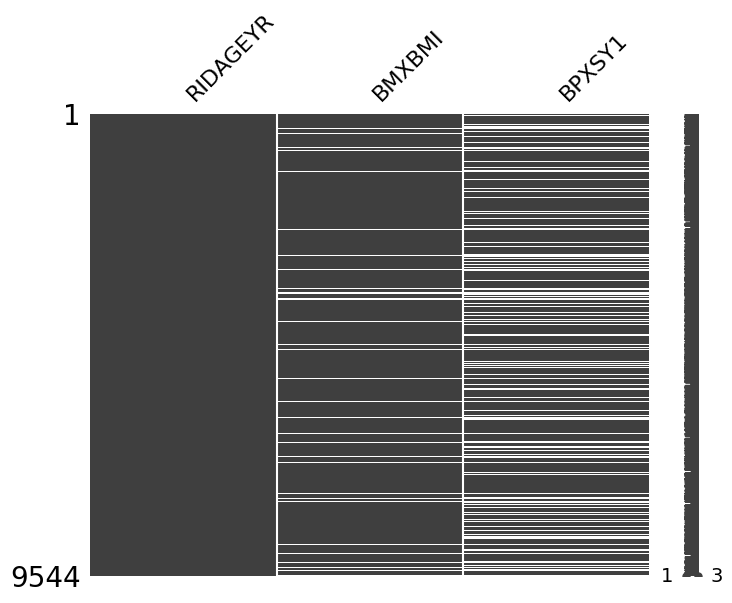

In [ ]:
miss.matrix(data_query, figsize=(8,6))

<Axes: >

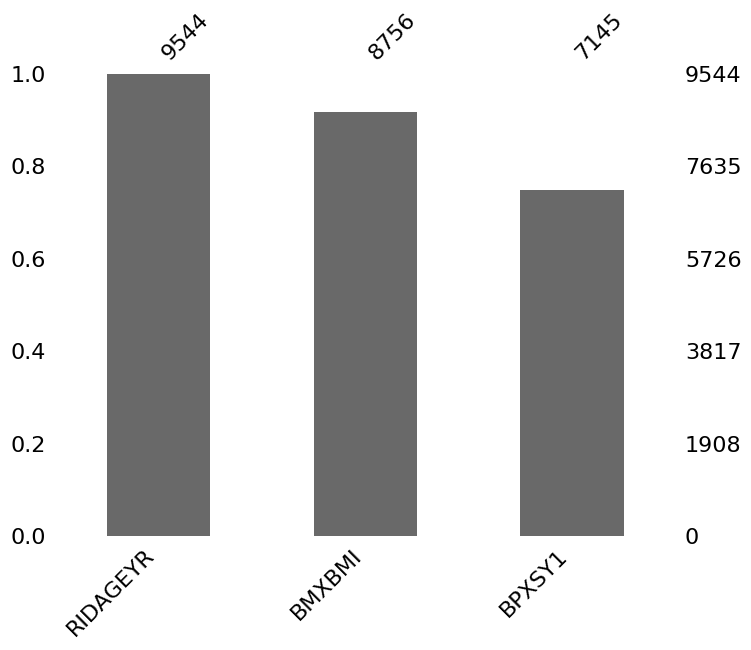

In [ ]:
miss.bar(data_query, figsize=(8,6))

In [ ]:
data_query.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,9544.0,31.871752,24.686463,5.397605e-79,9.0,27.0,53.0,80.0
BMXBMI,8756.0,26.016697,7.963873,1.150000e+01,19.9,25.2,30.6,67.3
BPXSY1,7145.0,120.539398,18.616921,7.200000e+01,108.0,118.0,130.0,236.0


In [ ]:
display(data_query[['RIDAGEYR']].min())
display(data_query[['RIDAGEYR']].max())

,0
RIDAGEYR,5.397605e-79


,0
RIDAGEYR,80.0


<Axes: xlabel='RIDAGEYR'>

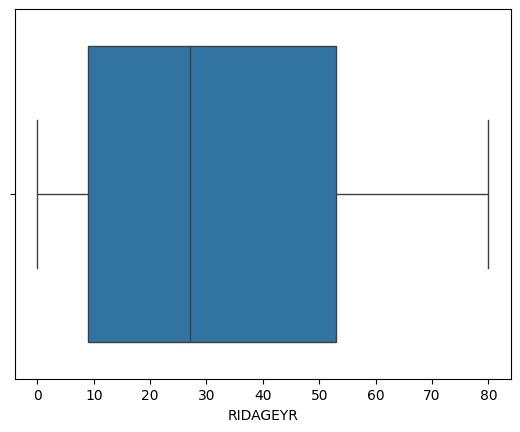

In [ ]:
sns.boxplot(data=data_query.loc[lambda f: f['RIDAGEYR'] > 0], x='RIDAGEYR')

<Axes: xlabel='RIDAGEYR'>

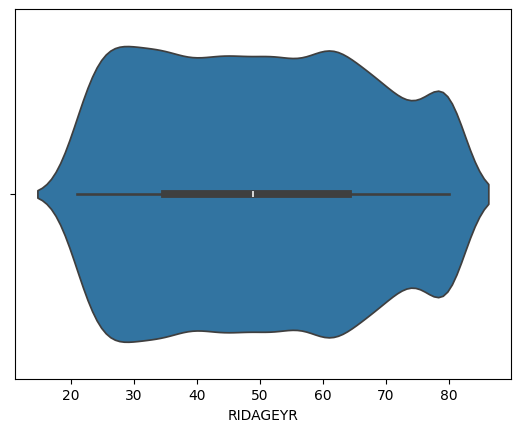

In [ ]:
sns.violinplot(data=data_query.loc[lambda f: f['RIDAGEYR'] > 20], x='RIDAGEYR')

<Axes: xlabel='BMXBMI'>

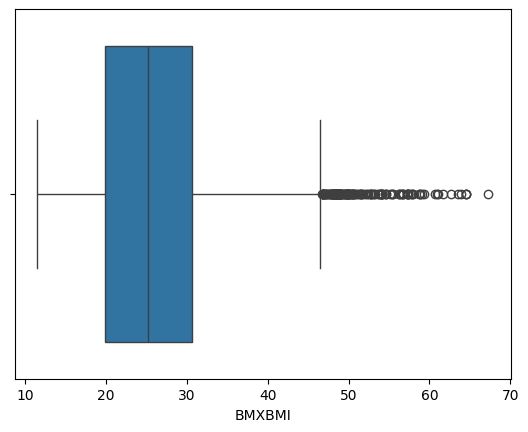

In [ ]:
sns.boxplot(data=data_query.loc[lambda f: f['BMXBMI'] > 0], x = 'BMXBMI')

<Axes: xlabel='BMXBMI'>

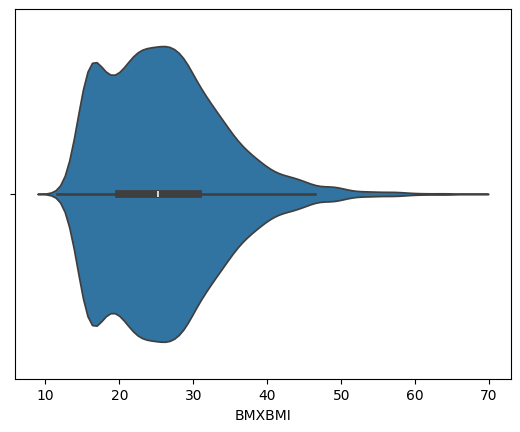

In [ ]:
sns.violinplot(data=data_query.loc[lambda f: f['BMXBMI'] > 0], x = 'BMXBMI')

<Axes: xlabel='BPXSY1'>

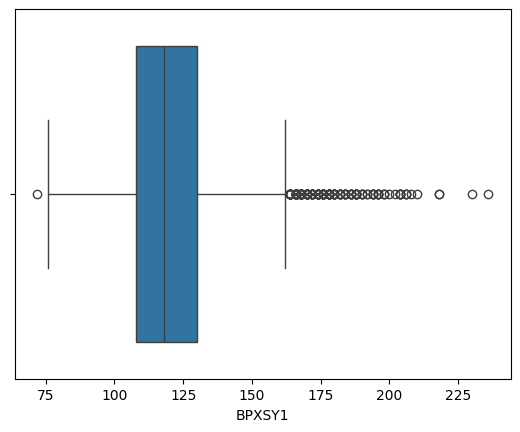

In [ ]:
sns.boxplot(data=data_query[lambda f: f['BPXSY1'] >0], x = 'BPXSY1')

<Axes: xlabel='BPXSY1'>

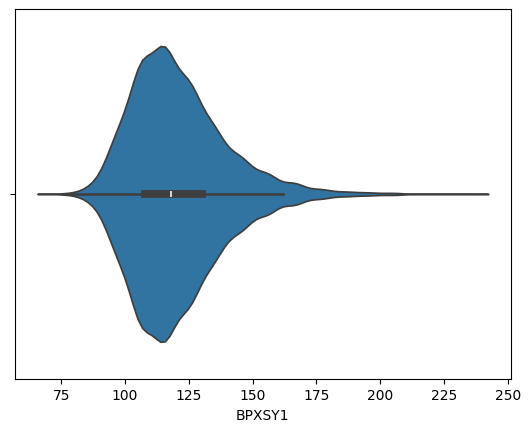

In [ ]:
sns.violinplot(data=data_query[lambda f: f['BPXSY1'] >0], x = 'BPXSY1')

# Skewness positiva e curtose positiva

Uma skewness positiva significa que a distribuição tem uma cauda mais longa à direita, ou seja, que há uma maior concentração de dados em valores menores e que existem alguns valores extremos maiores (outliers) puxando a cauda para a direita.
Isso sugere uma maior presença de outliers, com dados mais concentrados próximos da média, mas com caudas mais pesadas. Mais dados estão próximos da média, mas existem valores extremos (outliers) tanto na cauda esquerda quanto na direita.

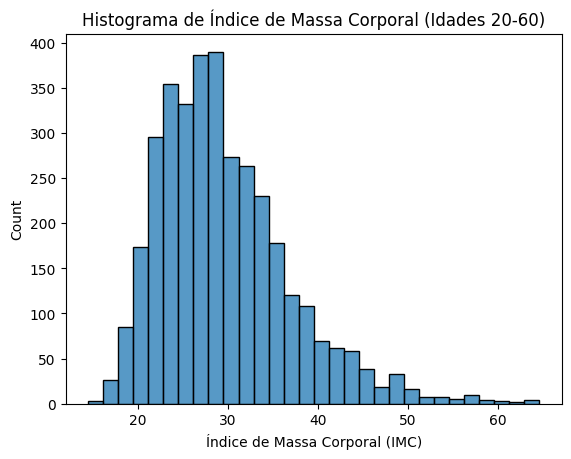

In [ ]:
#IDADE x IMC
sns.histplot(data=data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
             x='BMXBMI',
             bins=30)
plt.title("Histograma de Índice de Massa Corporal (Idades 20-60)")
plt.xlabel("Índice de Massa Corporal (IMC)")
plt.show()

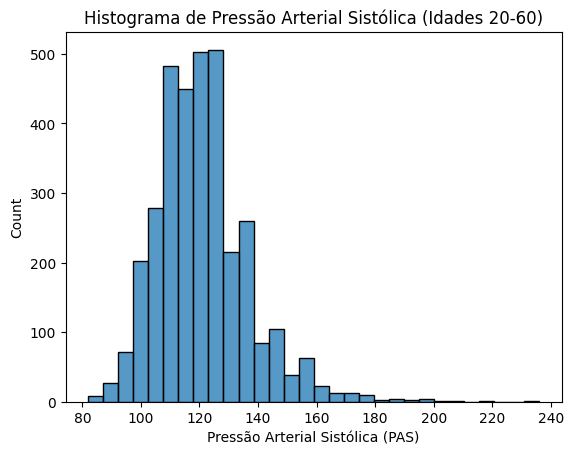

In [ ]:
#IDADE x PRESSÃO SANGUÍNEA
sns.histplot(data=data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
             x='BPXSY1',
             bins=30)
plt.title("Histograma de Pressão Arterial Sistólica (Idades 20-60)")
plt.xlabel("Pressão Arterial Sistólica (PAS)")
plt.show()

# Análise exploratória
## Visualize a relação entre o Índice de Massa Corporal (IMC), a Pressão Arterial Sistólica (PAS) utilizando gráficos apropriados (por exemplo, scatter plot).

In [ ]:
mean_bps = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BPXSY1'].mean()
median_bps = data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR'] <60), 'BPXSY1'].median()
stdv_bps = data_query.loc[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR'] <60), 'BPXSY1'].std()
print(f'Mean PAS: {mean_bps:.2f}')
print(f'Median PAS: {median_bps:.2f}')
print(f'Std PAS: {stdv_bps:.2f}')

Mean PAS: 120.96
Median PAS: 118.00
Std PAS: 15.78


In [ ]:
mean_bmi = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BMXBMI'].mean()
median_bmi = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BMXBMI'].median()
stdv_bmi = data_query.loc[(data_query['RIDAGEYR'] > 20) & (data_query['RIDAGEYR'] < 60), 'BMXBMI'].std()
print(f'Mean IMC: {mean_bmi:.2f}')
print(f'Median IMC: {median_bmi:.2f}')
print(f'Std IMC: {stdv_bmi:.2f}')

Mean IMC: 29.62
Median IMC: 28.40
Std IMC: 7.32


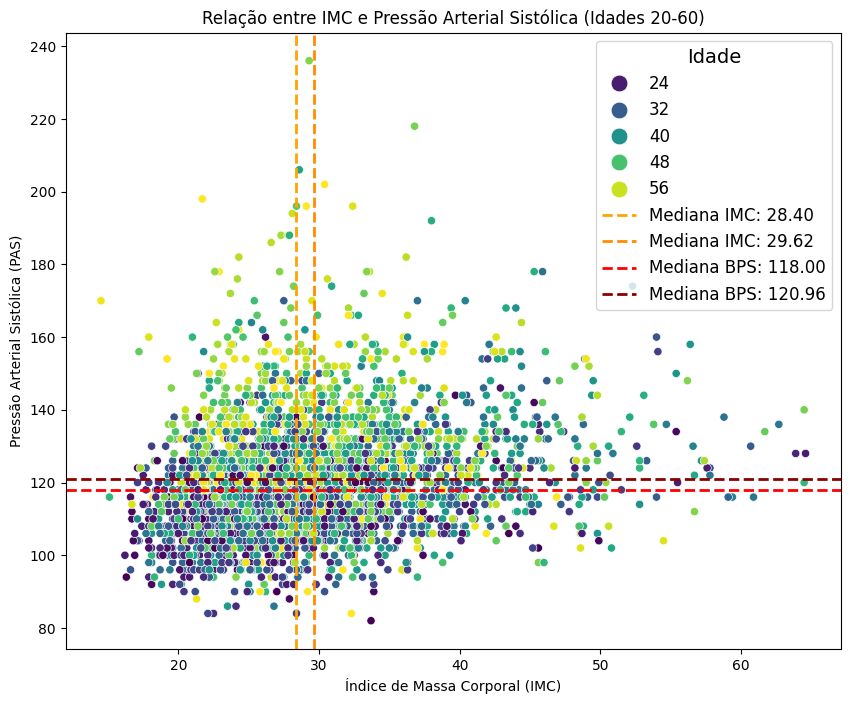

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data_query[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)],
    x='BMXBMI',
    y='BPXSY1',
    hue='RIDAGEYR',
    palette='viridis'
)

plt.axvline(median_bmi, color='orange', linestyle='--', linewidth=2, label=f'Mediana IMC: {median_bmi:.2f}')
plt.axvline(mean_bmi, color='darkorange', linestyle='--', linewidth=2, label=f'Mediana IMC: {mean_bmi:.2f}')

plt.axhline(median_bps, color='red', linestyle='--', linewidth=2, label=f'Mediana BPS: {median_bps:.2f}')
plt.axhline(mean_bps, color='darkred', linestyle='--', linewidth=2, label=f'Mediana BPS: {mean_bps:.2f}')

plt.title("Relação entre IMC e Pressão Arterial Sistólica (Idades 20-60)")
plt.legend(title='Idade', fontsize=12, title_fontsize=14, markerscale=2)
plt.xlabel("Índice de Massa Corporal (IMC)")
plt.ylabel("Pressão Arterial Sistólica (PAS)")
plt.show()

<Figure size 2000x1000 with 0 Axes>

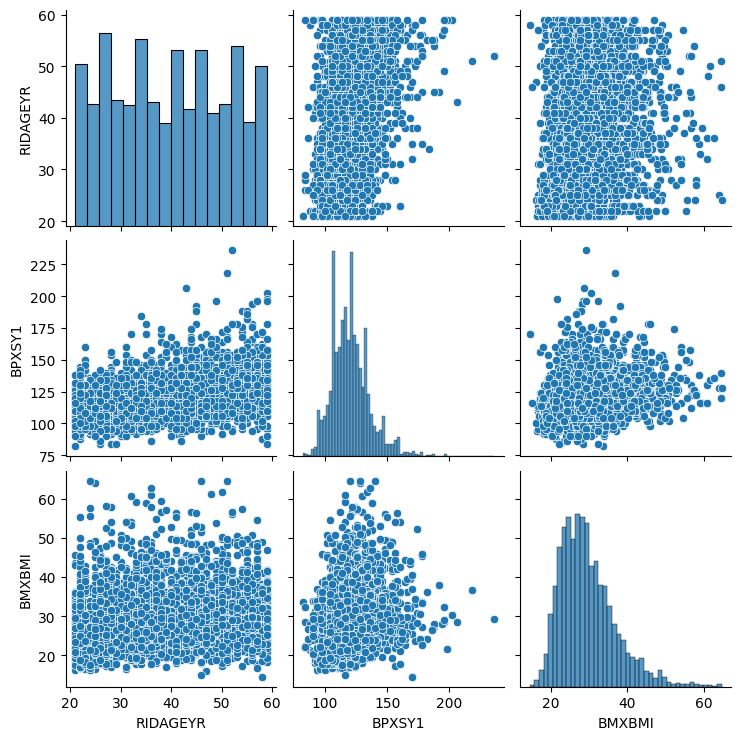

In [ ]:
plt.figure(figsize=(20, 10))
sns.pairplot(
    data=data_query[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)]
    .reindex(columns=['RIDAGEYR','BPXSY1','BMXBMI'])
)
plt.show()

# Imputation dos Missingvalues pela mediana uma vez que é mais robusta para lidar com outliers em uma distribuição assimétrica como BMX e BPX

In [ ]:
# Imputando valores ausentes pela mediana
data_query['BMXBMI'].fillna(data_query['BMXBMI'].median(), inplace=True)
data_query['BPXSY1'].fillna(data_query['BPXSY1'].median(), inplace=True)

<ipython-input-151-c4bc96c48f24>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_query['BMXBMI'].fillna(data_query['BMXBMI'].median(), inplace=True)
<ipython-input-151-c4bc96c48f24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_query['BMXBMI'].fillna(data_query['BMXBMI'].median(), inplace=True)
<ipython-input-151-c4bc96c48f24>:3:

<Axes: >

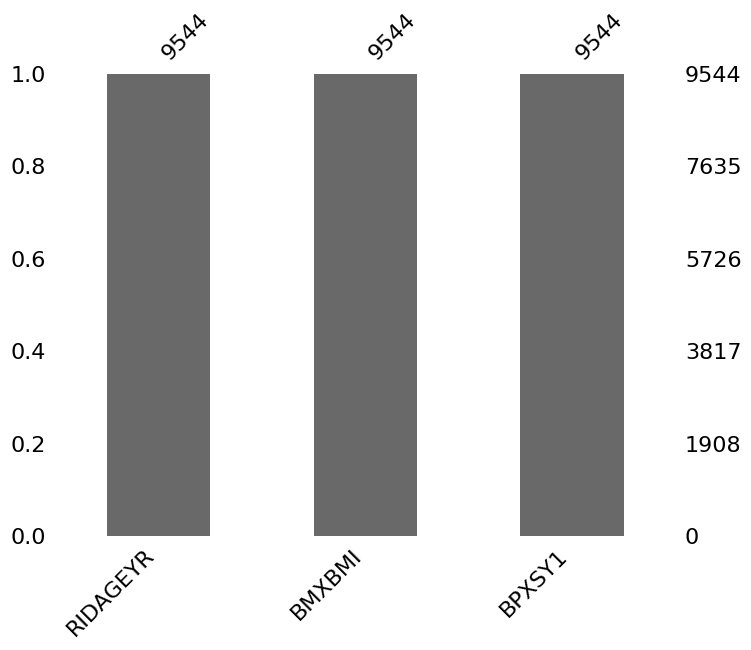

In [ ]:
miss.bar(data_query, figsize=(8,6))

In [ ]:
data_query.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,9544.0,31.871752,24.686463,5.397605e-79,9.0,27.0,53.0,80.0
BMXBMI,9544.0,25.949267,7.631299,1.150000e+01,20.5,25.2,30.0,67.3
BPXSY1,9544.0,119.901090,16.145423,7.200000e+01,112.0,118.0,126.0,236.0


In [ ]:
data_query.isnull().sum()

,0
RIDAGEYR,0
BMXBMI,0
BPXSY1,0


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

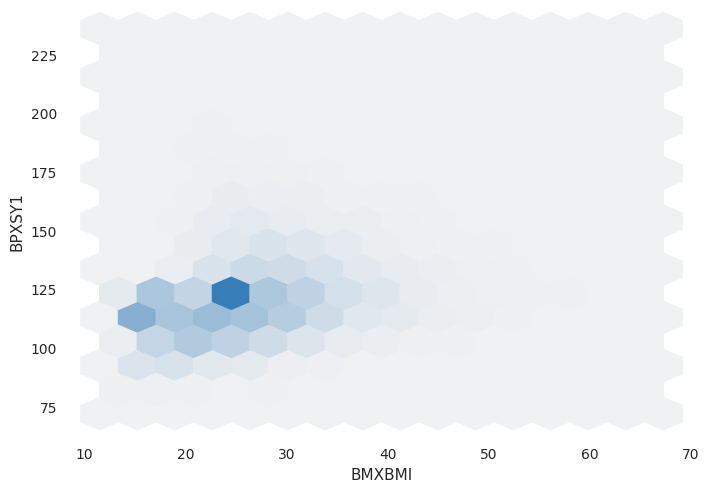

In [ ]:
# Gerando o relatório a partir do DataFrame
profile = ProfileReport(data_query, title="Relatório de Perfil - Filtro de Dados NHANES", explorative=True)

# Exibindo o relatório no notebook (se estiver usando Jupyter Notebook ou Google Colab)
profile.to_notebook_iframe()

# Para salvar o relatório em formato HTML
profile.to_file("relatorio_data_query.html")

# Estimativa do modelo:
Crie um modelo de regressão linear simples para prever a Pressão Arterial Sistólica (PAS) a partir do Índice de Massa Corporal (IMC).


1.   Y-predito [variável dependente] = Pressão Arterial Sistólica (PAS)
2.   x1 [variável independente] = Índice de Massa Corporal (IMC)




# y = b0 + b1x1

In [ ]:
data_query

,RIDAGEYR,BMXBMI,BPXSY1
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
...,...,...,...
9539,2.0,25.2,118.0
9540,6.0,18.2,118.0
9541,35.0,26.0,104.0
9542,8.0,18.1,114.0


In [ ]:
# data_query = data_query[(data_query['RIDAGEYR']>20) & (data_query['RIDAGEYR']<60)]
# data_query

,RIDAGEYR,BMXBMI,BPXSY1
1,53.0,30.8,146.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
9,22.0,28.0,110.0
10,32.0,28.2,120.0
...,...,...,...
9531,32.0,32.9,112.0
9532,25.0,21.0,112.0
9537,26.0,33.8,118.0
9541,35.0,26.0,104.0


In [ ]:
#Y-predito [variável dependente] = Pressão Arterial Sistólica (PAS)
y = data_query[['BPXSY1']]
y

,BPXSY1
0,128.0
1,146.0
2,138.0
3,132.0
4,100.0
...,...
9539,118.0
9540,118.0
9541,104.0
9542,114.0


In [ ]:
# x1 [varivale independente] = Índice de Massa Corporal (IMC)
x1 = data_query[['BMXBMI']]
x1

,BMXBMI
0,27.8
1,30.8
2,28.8
3,42.4
4,20.3
...,...
9539,25.2
9540,18.2
9541,26.0
9542,18.1


In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     909.8
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          5.46e-191
Time:                        18:38:09   Log-Likelihood:                -39655.
No. Observations:                9544   AIC:                         7.931e+04
Df Residuals:                    9542   BIC:                         7.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.7033      0.560    185.269      0.000     102.606     104.800
BMXBMI         0.6242      0.021     30.163      0.000       0.584       0.665
==============================================================================
Omnibus:                     2726.197   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10487.295
Skew:                           1.382   Prob(JB):                         0.00
Kurtosis:                       7.328   Cond. No.                         96.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [ ]:
# Criando o modelo de regressão linear
model = LinearRegression()

In [ ]:
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

#

# Avaliação do modelo:
Avalie a qualidade do modelo usando métricas como o R2, o erro médio absoluto (MAE) ou o erro quadrático médio (MSE).

In [ ]:
# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Erro Quadrático Médio): {mse}")

# Calculando o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Erro Médio Absoluto): {mae}")

R²: 0.080867299330865
MSE (Erro Quadrático Médio): 253.24788446674597
MAE (Erro Médio Absoluto): 10.963750684536729


Resposta:

1. R² (Coeficiente de Determinação): 0.0809
 O R² mede a proporção da variabilidade total da variável independente (x1) que é explicada pelo modelo. Ele varia de 0 a 1, no qual o valor igual a 1 elucida 100% da variação nos dados e igual a 0, o modelo não explica nada da variação nos dadps. Nesse caso, o valor do R2 indica que o modelo explica apenas 8.09% da variabilidade dos dados.

2. MSE (Erro Quadrático Médio): 253.25
O MSE é a média dos quadrados das diferenças entre os valores preditos e os valores reais. Nesse caso, o valor indica que o modelo está cometendo grandes erros de predição. Devido a particularidade na penalização mais forte do MSE, o resultado sugere que há discrepâncias entre previsões do modelo e os dados reais. O resultado não é satisfatório.

3. MAE (Erro Médio Absoluto): 10.96
O MAE mede a magnitude média dos erros sem considerar a direção (erro absoluto). Aqui, o modelo comete um erro médio de aproximadamente 10.96 unidades nas previsões. Isso significa que, em média, as previsões estão errando em cerca de 11 unidades em relação aos valores reais. Ideia reforçada de que o modelo não é preciso.

# Interprete os coeficientes do modelo.

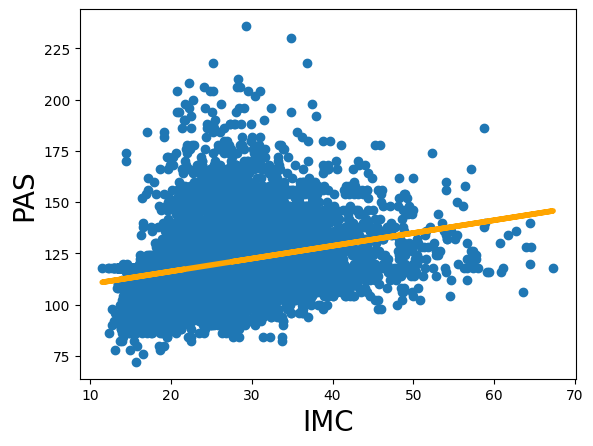

In [ ]:
plt.scatter(x1,y)

yhat = 0.6242*x1 + 103.703

fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

plt.xlabel('IMC', fontsize=20)
plt.ylabel('PAS', fontsize=20)

plt.show()

1. O modelo de regressão linear fornecido é da forma:
y = 0.6242x1 + 103.703

- No que tange a interpretação do modelo, pode-se dizer que com o aumento do IMC (variável independente - x1), haverá aumento para a pressão arterial (PAXS - variável independente) em 0.6242 unidades, com valor base de 103.703.

- y é o valor predito (variável dependente).
- x1 é a variável independente

- 0.6242 é o coeficiente de regressão associado a x1 (inclinação da reta) ​
  - Este valor indica que para cada aumento unitário em x1, o valor predito de y aumenta em 0.6242 unidades. Nesse caso, se o IMC varia de 1 unidade, a previsão de PAS aumenta em aproximadamente 0.62. Como o coeficiente é positivo, indica uma relação direta, ou seja, conforme x1 aumenta, y predito também aumenta.

- 103.703 é o intercepto (o valor de y quando x1=0).
  - Nesse caso, x1=0, o valor de y predito é 103.703. Se x1=0, o valor de y predito será de 103.107.


# Perguntas:


1.   Podemos afirmar, com base no modelo, que existe uma relação estatisticamente significativa entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS)? Explique.
  - Um valor P abaixo de 0,05 significa que a variável é significativa. Por isso o coeficiente é diferente de 0. Além disso, com um valor p de 0.000, pode-se afirmar com alta confiança que existe uma relação estatisticamente significativa entre o IMC e a PAS. Isso significa que o IMC é um preditor importante da PAS.





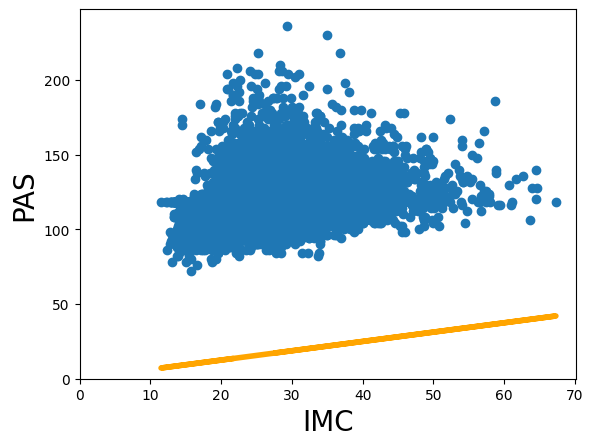

In [ ]:
plt.scatter(x1,y)

yhat = 0.6242*x1 + 0

fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

plt.xlabel('IMC', fontsize=20)
plt.ylabel('PAS', fontsize=20)
plt.xlim(0)
plt.ylim(0)

plt.show()

2.   Refaça o exercício para IMC e o nível de glicose no sangue (LBGLU), e IMC e a circunferência da cintura (BMXWAIST). Quais dessas medidas estão correlacionadas?
3. Utilizando o modelo de regressão, qual seria o valor estimado da circunferência da cintura para um indivíduo com IMC igual a 25?

ValueError: Header record is not an XPORT file.